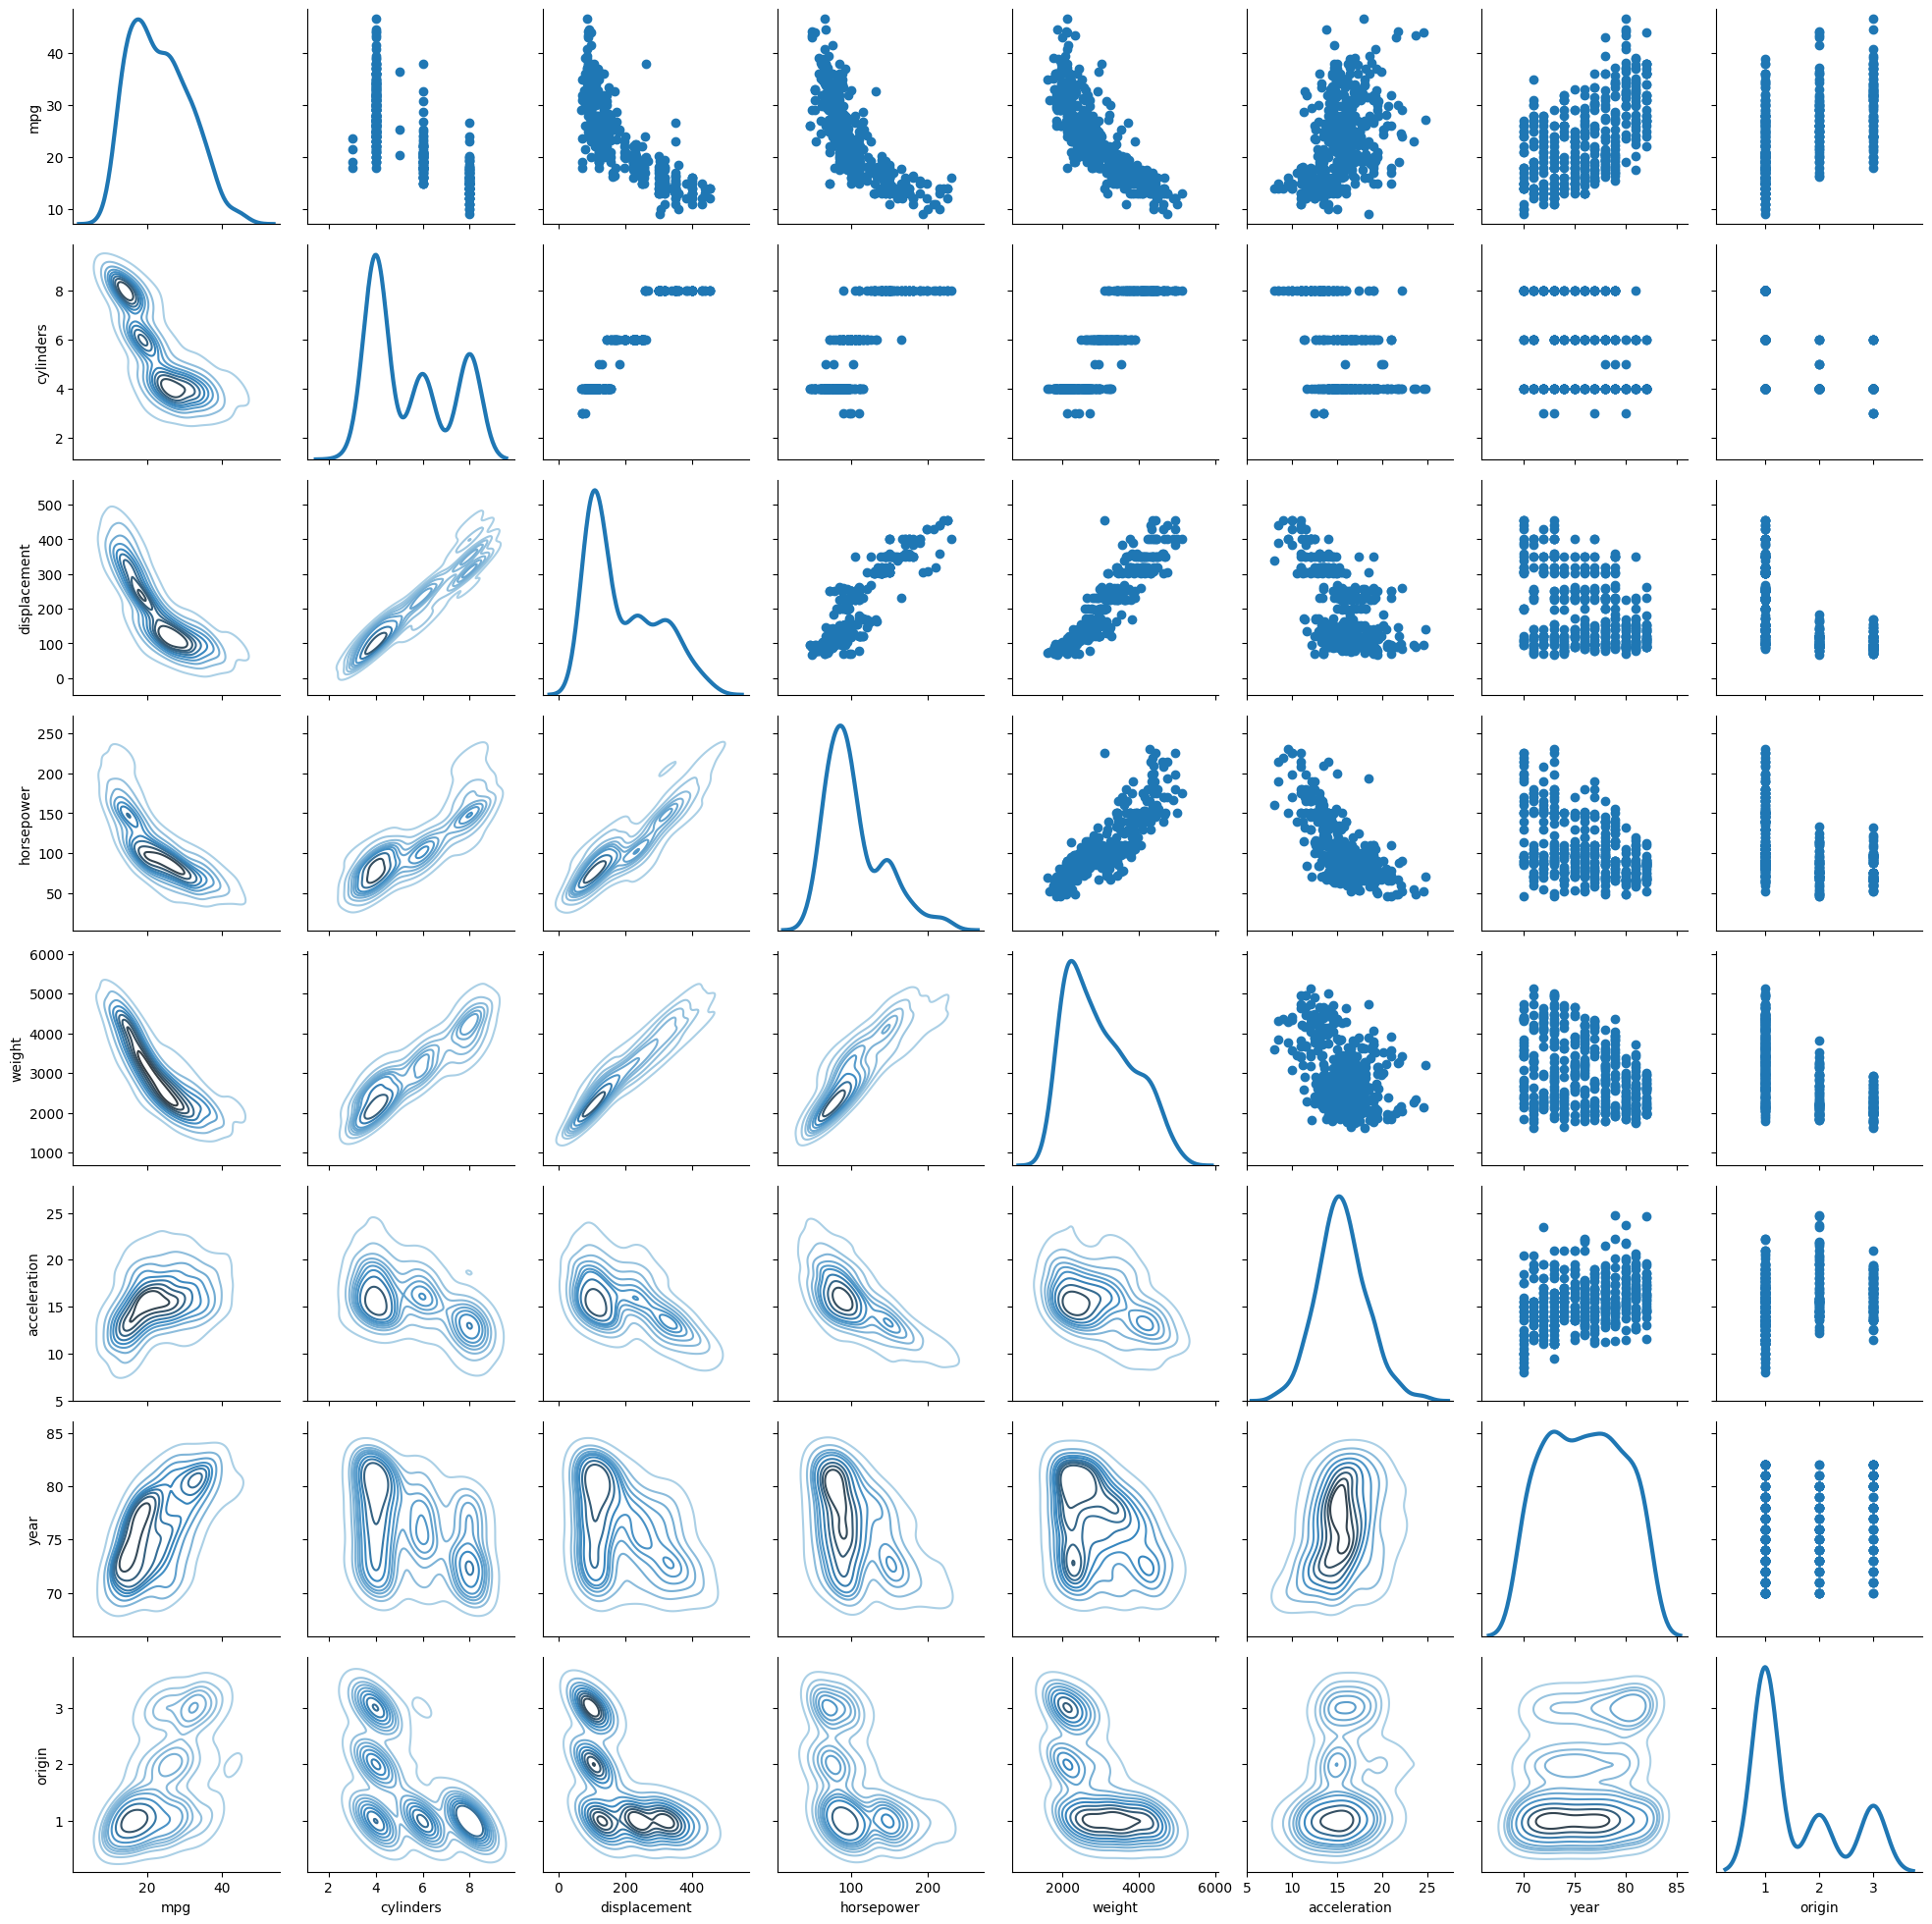

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from ISLP import load_data
from ISLP.models import ModelSpec as MS, summarize, poly
Auto = load_data("Auto")
g = sns.PairGrid(Auto, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3, legend=False);

In [2]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [3]:
reg = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', Auto).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 17 Apr 2025   Prob (F-statistic):          2.04e-139
Time:                        16:45:12   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i: Yes, the data provides strong evidence of a significant relationship between the predictors and mpg. The F-statistic value of 252 substantially exceeds 1, allowing us to confidently reject the null hypothesis that all coefficients equal zero:

H₀ : β<sub>cylinders</sub> = β<sub>displacement</sub> = β<sub>weight</sub> = β<sub>acceleration</sub> = β<sub>year</sub> = β<sub>origin</sub> = 0

The probability of observing our data if the null hypothesis were true is approximately 2 × 10<sup>-139</sup>, an extraordinarily small value that further strengthens our conclusion.

ii: Examining the p-values reveals which predictors have statistically significant relationships with the response variable. The variables weight, year, and origin definitely demonstrate significant relationships with mpg, while displacement could also be considered significant. In contrast, the predictors cylinders, horsepower, and acceleration do not show statistically significant relationships at the standard significance level.

iii: The coefficient for the year variable (0.75) indicates that, holding all other variables constant, vehicles gain approximately 0.75 mpg in fuel efficiency for each additional year of production. This trend demonstrates that more recent automobiles tend to be more fuel-efficient, likely reflecting technological advancements and evolving efficiency standards over time.